In [109]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [110]:
data=pd.read_csv('ShoppingComplex_Customers_dataset.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [111]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,203.000000,203.000000,203.000000,203.000000
mean,102.000000,38.822660,61.596059,50.054187
std,58.745213,13.889168,27.416559,25.836922
min,1.000000,18.000000,15.000000,1.000000
25%,51.500000,29.000000,42.000000,33.000000
50%,102.000000,36.000000,62.000000,50.000000
75%,152.500000,49.000000,78.000000,73.000000
max,203.000000,70.000000,137.000000,99.000000


### Data preprocessing

In [112]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [113]:
data['Gender']


0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
198      Male
199      Male
200    Female
201      Male
202      Male
Name: Gender, Length: 203, dtype: object

In [114]:
df = pd.get_dummies(data, columns=['Gender'], drop_first=True, dtype=int)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [115]:
#Correlation check
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,1.000000,-0.029584,0.973632,0.003735,0.067348
Age,-0.029584,1.000000,-0.017025,-0.324425,0.052934
Annual Income (k$),0.973632,-0.017025,1.000000,-0.006454,0.070468
Spending Score (1-100),0.003735,-0.324425,-0.006454,1.000000,-0.054971
Gender_Male,0.067348,0.052934,0.070468,-0.054971,1.000000


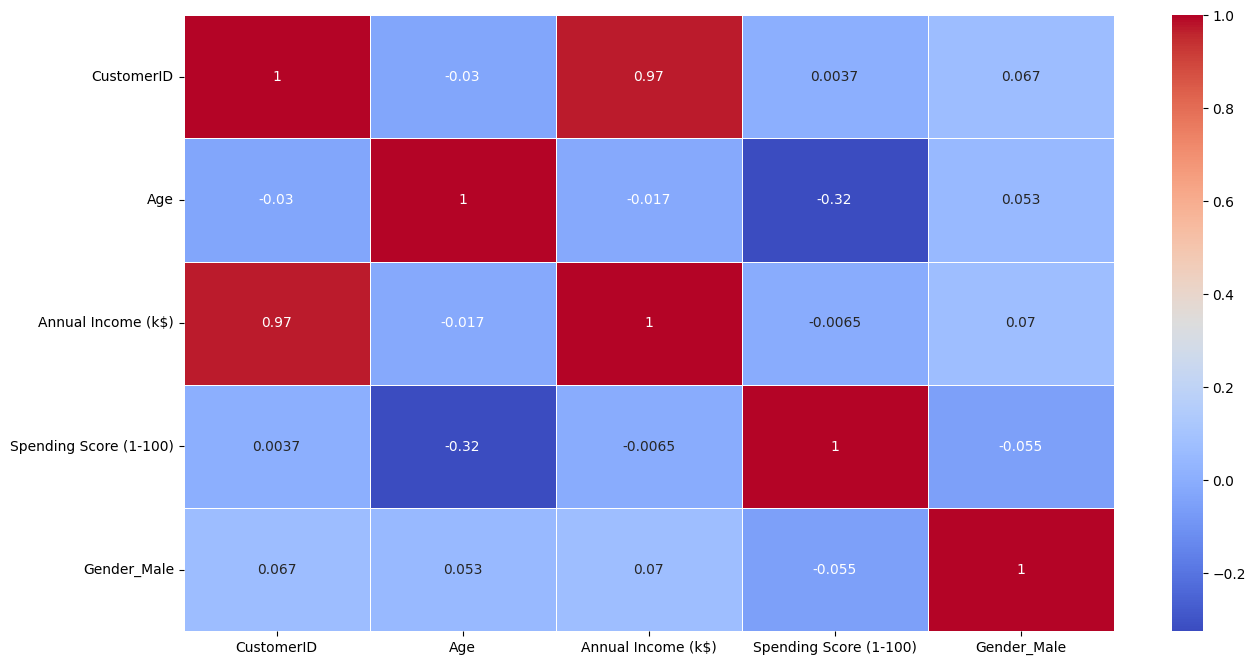

In [116]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.show()

### Feature Engineering

In [117]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [118]:

df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


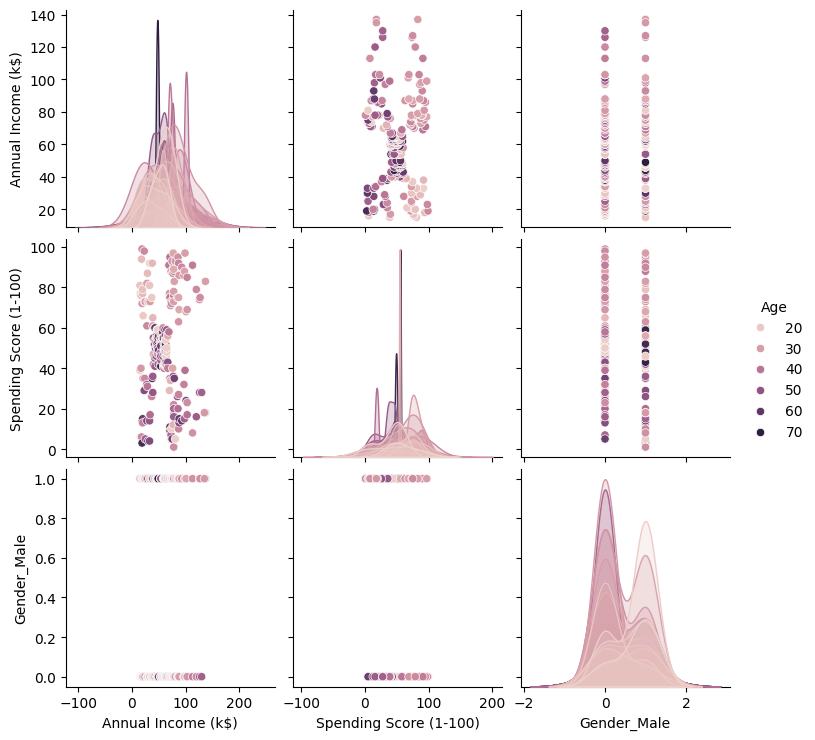

In [119]:
sns.pairplot(df,hue='Age')

In [120]:
#Scaling of feature
ssc=StandardScaler()
new_df=ssc.fit_transform(df)
df1=pd.DataFrame(new_df,columns=['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male'])
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.430731,-1.703761,-0.428902,1.120516
1,-1.286378,-1.703761,1.200697,1.120516
2,-1.358555,-1.667196,-1.709302,-0.892446
3,-1.142025,-1.667196,1.045497,-0.892446
4,-0.564613,-1.630632,-0.390102,-0.892446


### Finding Correct Values of K(Cluster)

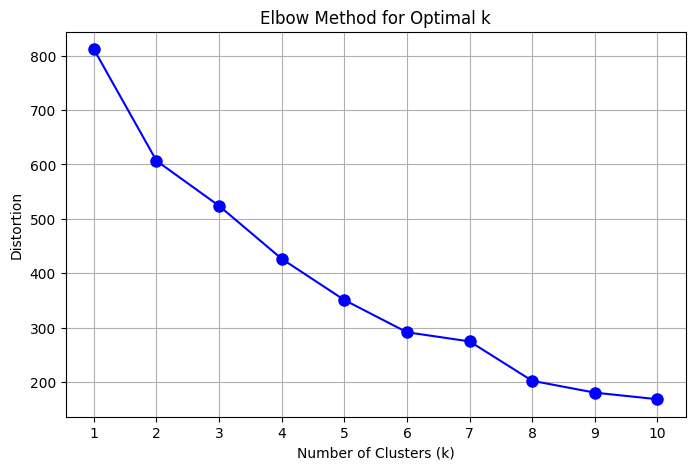

In [121]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    distortions.append(kmeans.inertia_)

# Step 3: Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.xticks(K)
plt.grid()
plt.show()

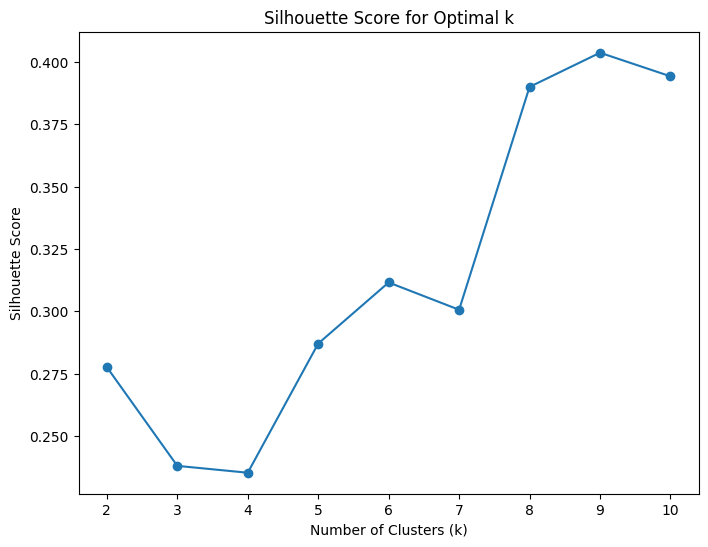

The optimal number of clusters (k) is: 9


In [122]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# List to store silhouette scores for different k
sil_scores = []

# Try different values of k (from 2 to 10 in this example)
for k in range(2, 11):  # Note: k must be at least 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    score = silhouette_score(df1, kmeans.labels_)
    sil_scores.append(score)

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k with the highest silhouette score
optimal_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f"The optimal number of clusters (k) is: {optimal_k}")

### Model Building

In [123]:
kmeans_score_9 = KMeans(n_clusters=9, init='k-means++', random_state=42)
predicted_values_score_9 = kmeans_score_9.fit_predict(df1)

# Optionally increment cluster labels (for human-readable clusters)
predicted_values_score_9 = predicted_values_score_9 + 1

# Create a DataFrame for cluster labels
pred_score_9 = pd.DataFrame(predicted_values_score_9, columns=['Predicted_Cluster'], index=df1.index)

# Merge with the original dataset
df_out_9 = pd.concat([df1, pred_score_9], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_9['Predicted_Cluster'].unique()}")

# Calculate silhouette score
score_9 = silhouette_score(df1, predicted_values_score_9)
print(f"Silhouette Score (9 clusters): {score_9}")

# Group by clusters and calculate means
predicted_cluster_9 = df_out_9.groupby(by='Predicted_Cluster').mean()
predicted_cluster_9

Unique clusters: [5 9 7 6 1 2 3 4 8]
Silhouette Score (9 clusters): 0.4036269030226219


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,0.960718,-0.216805,-0.062889,-0.892446
2,-0.397467,1.009709,1.249708,1.120516
3,-0.478688,0.894059,1.226564,-0.892446
4,-0.052159,0.978244,-1.383382,1.120516
5,-1.025915,-0.764212,0.443254,1.120516
6,1.340333,-0.502356,-0.421974,1.120516
7,-0.946724,-0.630486,0.391603,-0.892446
8,0.368871,1.248212,-1.122129,-0.892446
9,0.196017,-1.281863,-1.139240,-0.892446


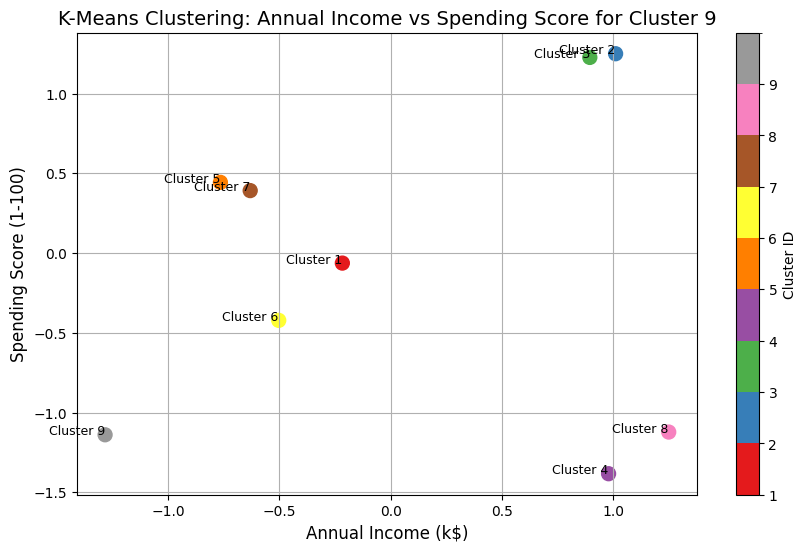

In [124]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of clusters
n_clusters = 9

# Scatter plot for visualization (2D)
plt.figure(figsize=(10, 6))

# Use a discrete colormap and normalize the cluster IDs to integers
scatter = plt.scatter(
    predicted_cluster_9["Annual Income (k$)"],
    predicted_cluster_9["Spending Score (1-100)"],
    c=range(1, n_clusters + 1),
    cmap='Set1',
    s=100,
    norm=mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)
)

# Add cluster labels
for i, (x, y) in enumerate(zip(predicted_cluster_9["Annual Income (k$)"], predicted_cluster_9["Spending Score (1-100)"])):
    plt.text(x, y, f"Cluster {i+1}", fontsize=9, ha='right')

# Plot settings
plt.title("K-Means Clustering: Annual Income vs Spending Score for Cluster 9", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Adjust the colorbar to display integers
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
plt.grid(True)

plt.show()


In [125]:
# Fit KMeans
kmeans_score_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_values_score_4 = kmeans_score_4.fit_predict(df1)

# Optionally increment cluster labels (for human-readable clusters)
predicted_values_score_4 = predicted_values_score_4 + 1

# Create a DataFrame for cluster labels
pred_score_4 = pd.DataFrame(predicted_values_score_4, columns=['Predicted_Cluster'], index=df1.index)

# Merge with the original dataset
df_out_4 = pd.concat([df1, pred_score_4], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_4['Predicted_Cluster'].unique()}")

# Calculate silhouette score
score_4 = silhouette_score(df1, predicted_values_score_4)
print(f"Silhouette Score: {score_4}")

# Group by clusters and calculate means
predicted_cluster_4 = df_out_4.groupby(by='Predicted_Cluster').mean()
predicted_cluster_4


Unique clusters: [3 1 4 2]
Silhouette Score: 0.2353084764298372


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,1.121983,-0.378836,-0.557285,-0.093182
2,-0.375149,0.739965,0.010831,1.120516
3,-0.927446,-1.174070,0.607162,-0.076381
4,-0.479444,0.673662,0.298209,-0.892446


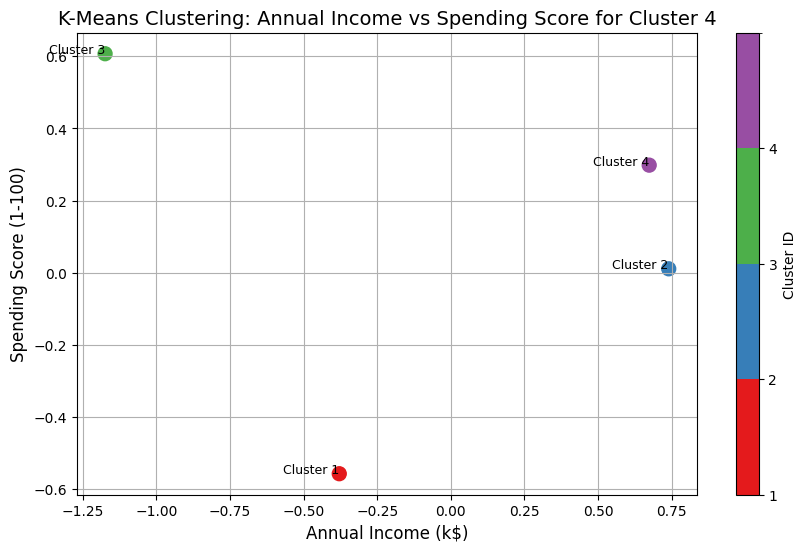

In [126]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of clusters
n_clusters = 4

# Scatter plot for visualization (2D)
plt.figure(figsize=(10, 6))

# Use a discrete colormap and normalize the cluster IDs to integers
scatter = plt.scatter(
    predicted_cluster_4["Annual Income (k$)"],
    predicted_cluster_4["Spending Score (1-100)"],
    c=range(1, n_clusters + 1),
    cmap='Set1',
    s=100,
    norm=mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)
)

# Add cluster labels
for i, (x, y) in enumerate(zip(predicted_cluster_4["Annual Income (k$)"], predicted_cluster_4["Spending Score (1-100)"])):
    plt.text(x, y, f"Cluster {i+1}", fontsize=9, ha='right')

# Plot settings
plt.title("K-Means Clustering: Annual Income vs Spending Score for Cluster 4", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Adjust the colorbar to display integers
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
plt.grid(True)

plt.show()


In [127]:
kmeans_score_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
predicted_values_score_5 = kmeans_score_5.fit_predict(df1)

# Optionally increment cluster labels (for human-readable clusters)
predicted_values_score_5 = predicted_values_score_5 + 1

# Create a DataFrame for cluster labels
pred_score_5 = pd.DataFrame(predicted_values_score_5, columns=['Predicted_Cluster'], index=df1.index)

# Merge with the original dataset
df_out_5 = pd.concat([df1, pred_score_5], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_5['Predicted_Cluster'].unique()}")

# Calculate silhouette score
score_5 = silhouette_score(df1, predicted_values_score_5)
print(f"Silhouette Score (5 clusters): {score_5}")

# Group by clusters and calculate means
predicted_cluster_5 = df_out_5.groupby(by='Predicted_Cluster').mean()
predicted_cluster_5

Unique clusters: [3 1 5 4 2]
Silhouette Score (5 clusters): 0.2870672685434195


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,0.645927,-0.067981,-0.592271,-0.892446
2,-0.658018,0.829943,0.393886,1.120516
3,-1.010561,-1.231034,0.909697,0.114035
4,-0.691781,0.368227,0.578974,-0.892446
5,1.021553,-0.127135,-0.700502,1.120516


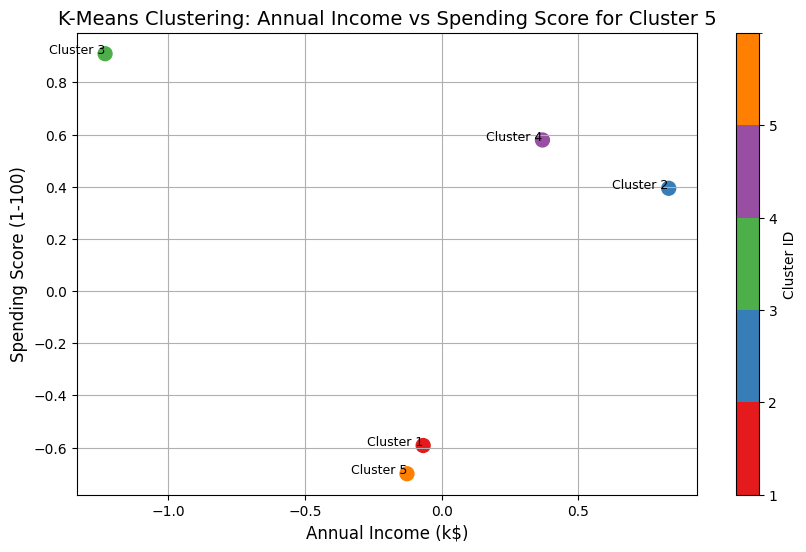

In [128]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of clusters
n_clusters = 5

# Scatter plot for visualization (2D)
plt.figure(figsize=(10, 6))

# Use a discrete colormap and normalize the cluster IDs to integers
scatter = plt.scatter(
    predicted_cluster_5["Annual Income (k$)"],
    predicted_cluster_5["Spending Score (1-100)"],
    c=range(1, n_clusters + 1),
    cmap='Set1',
    s=100,
    norm=mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)
)

# Add cluster labels
for i, (x, y) in enumerate(zip(predicted_cluster_5["Annual Income (k$)"], predicted_cluster_5["Spending Score (1-100)"])):
    plt.text(x, y, f"Cluster {i+1}", fontsize=9, ha='right')

# Plot settings
plt.title("K-Means Clustering: Annual Income vs Spending Score for Cluster 5", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Adjust the colorbar to display integers
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
plt.grid(True)

plt.show()


In [129]:
kmeans_score_6 = KMeans(n_clusters=6, init='k-means++', random_state=42)
predicted_values_score_6 = kmeans_score_6.fit_predict(df1)

# Optionally increment cluster labels (for human-readable clusters)
predicted_values_score_6 = predicted_values_score_6 + 1

# Create a DataFrame for cluster labels
pred_score_6 = pd.DataFrame(predicted_values_score_6, columns=['Predicted_Cluster'], index=df1.index)

# Merge with the original dataset
df_out_6 = pd.concat([df1, pred_score_6], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_6['Predicted_Cluster'].unique()}")

# Calculate silhouette score
score_6 = silhouette_score(df1, predicted_values_score_6)
print(f"Silhouette Score (6 clusters): {score_6}")

# Group by clusters and calculate means
predicted_cluster_6 = df_out_6.groupby(by='Predicted_Cluster').mean()
predicted_cluster_6

Unique clusters: [3 1 6 4 2 5]
Silhouette Score (6 clusters): 0.31156317032841785


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,0.673711,-0.390307,-0.530847,-0.892446
2,-0.580652,0.694598,0.890297,1.120516
3,-1.027077,-1.216234,0.957838,0.151312
4,-0.648272,0.451051,0.513761,-0.892446
5,0.012800,1.183371,-1.321302,0.717923
6,1.284600,-0.532436,-0.427564,1.120516


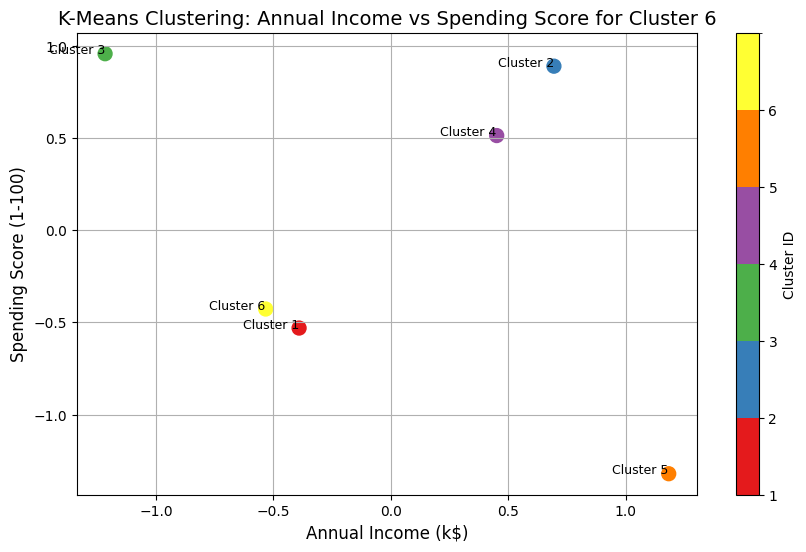

In [130]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of clusters
n_clusters = 6

# Scatter plot for visualization (2D)
plt.figure(figsize=(10, 6))

# Use a discrete colormap and normalize the cluster IDs to integers
scatter = plt.scatter(
    predicted_cluster_6["Annual Income (k$)"],
    predicted_cluster_6["Spending Score (1-100)"],
    c=range(1, n_clusters + 1),
    cmap='Set1',
    s=100,
    norm=mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)
)

# Add cluster labels
for i, (x, y) in enumerate(zip(predicted_cluster_6["Annual Income (k$)"], predicted_cluster_6["Spending Score (1-100)"])):
    plt.text(x, y, f"Cluster {i+1}", fontsize=9, ha='right')

# Plot settings
plt.title("K-Means Clustering: Annual Income vs Spending Score for Cluster 6", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Adjust the colorbar to display integers
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
plt.grid(True)

plt.show()


In [131]:
kmeans_score_7 = KMeans(n_clusters=7, init='k-means++', random_state=42)
predicted_values_score_7 = kmeans_score_7.fit_predict(df1)

# Optionally increment cluster labels (for human-readable clusters)
predicted_values_score_7 = predicted_values_score_7 + 1

# Create a DataFrame for cluster labels
pred_score_7 = pd.DataFrame(predicted_values_score_7, columns=['Predicted_Cluster'], index=df1.index)

# Merge with the original dataset
df_out_7 = pd.concat([df1, pred_score_7], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_7['Predicted_Cluster'].unique()}")

# Calculate silhouette score
score_7 = silhouette_score(df1, predicted_values_score_7)
print(f"Silhouette Score (7 clusters): {score_7}")

# Group by clusters and calculate means
predicted_cluster_7 = df_out_7.groupby(by='Predicted_Cluster').mean()
predicted_cluster_7

Unique clusters: [3 1 6 4 7 2 5]
Silhouette Score (7 clusters): 0.30061496689336387


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,0.680433,-0.477327,-0.490336,-0.892446
2,-0.580652,0.694598,0.890297,1.120516
3,-1.027077,-1.216234,0.957838,0.151312
4,-0.691362,0.396467,0.600717,-0.892446
5,0.030222,1.216354,-1.291867,0.356978
6,0.951095,-1.306122,-1.272802,1.120516
7,1.330806,-0.177591,-0.145494,1.120516


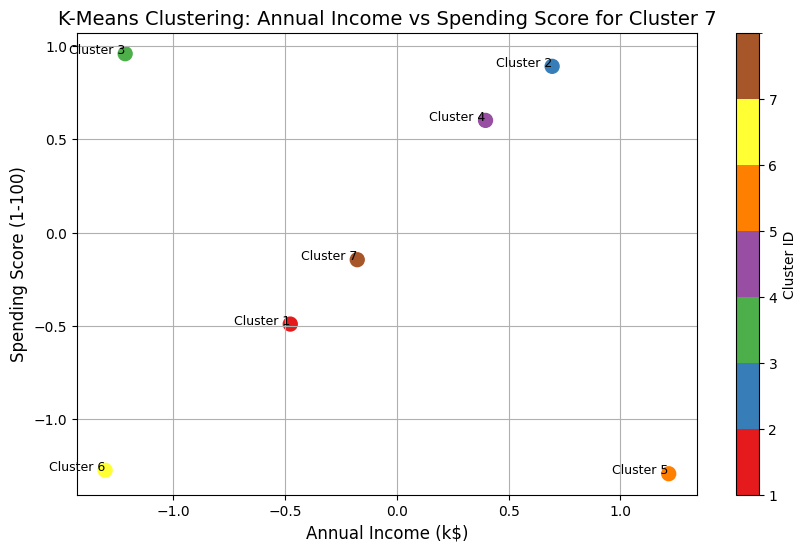

In [132]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of clusters
n_clusters = 7

# Scatter plot for visualization (2D)
plt.figure(figsize=(10, 6))

# Use a discrete colormap and normalize the cluster IDs to integers
scatter = plt.scatter(
    predicted_cluster_7["Annual Income (k$)"],
    predicted_cluster_7["Spending Score (1-100)"],
    c=range(1, n_clusters + 1),
    cmap='Set1',
    s=100,
    norm=mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)
)

# Add cluster labels
for i, (x, y) in enumerate(zip(predicted_cluster_7["Annual Income (k$)"], predicted_cluster_7["Spending Score (1-100)"])):
    plt.text(x, y, f"Cluster {i+1}", fontsize=9, ha='right')

# Plot settings
plt.title("K-Means Clustering: Annual Income vs Spending Score for Cluster 7", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Adjust the colorbar to display integers
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
plt.grid(True)

plt.show()


In [133]:
kmeans_score_8 = KMeans(n_clusters=8, init='k-means++', random_state=42)
predicted_values_score_8 = kmeans_score_8.fit_predict(df1)

# Optionally increment cluster labels (for human-readable clusters)
predicted_values_score_8 = predicted_values_score_8 + 1

# Create a DataFrame for cluster labels
pred_score_8 = pd.DataFrame(predicted_values_score_8, columns=['Predicted_Cluster'], index=df1.index)

# Merge with the original dataset
df_out_8 = pd.concat([df1, pred_score_8], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_8['Predicted_Cluster'].unique()}")

# Calculate silhouette score
score_8 = silhouette_score(df1, predicted_values_score_8)
print(f"Silhouette Score (8 clusters): {score_8}")

# Group by clusters and calculate means
predicted_cluster_8 = df_out_8.groupby(by='Predicted_Cluster').mean()
predicted_cluster_8

Unique clusters: [5 7 1 6 3 2 4 8]
Silhouette Score (8 clusters): 0.389926817582196


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Predicted_Cluster,,,,
1,0.848528,-0.507717,-0.361513,-0.892446
2,-0.397467,1.009709,1.249708,1.120516
3,-0.453067,0.865725,1.184824,-0.892446
4,-0.052159,0.978244,-1.383382,1.120516
5,-1.025915,-0.764212,0.443254,1.120516
6,1.340333,-0.502356,-0.421974,1.120516
7,-0.929397,-0.708614,0.287324,-0.892446
8,0.423304,1.209971,-1.088502,-0.892446


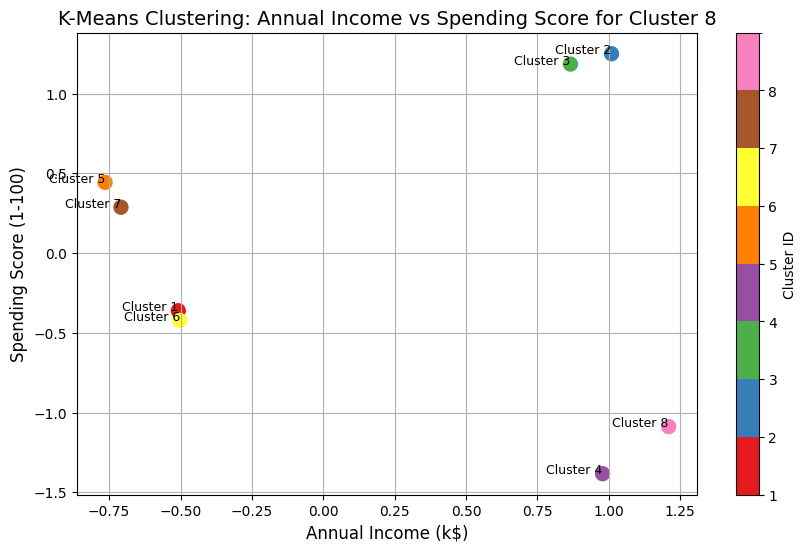

In [134]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of clusters
n_clusters = 8

# Scatter plot for visualization (2D)
plt.figure(figsize=(10, 6))

# Use a discrete colormap and normalize the cluster IDs to integers
scatter = plt.scatter(
    predicted_cluster_8["Annual Income (k$)"],
    predicted_cluster_8["Spending Score (1-100)"],
    c=range(1, n_clusters + 1),
    cmap='Set1',
    s=100,
    norm=mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)
)

# Add cluster labels
for i, (x, y) in enumerate(zip(predicted_cluster_8["Annual Income (k$)"], predicted_cluster_8["Spending Score (1-100)"])):
    plt.text(x, y, f"Cluster {i+1}", fontsize=9, ha='right')

# Plot settings
plt.title("K-Means Clustering: Annual Income vs Spending Score for Cluster 8", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Adjust the colorbar to display integers
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
plt.grid(True)

plt.show()


### Hierarchical clustering 

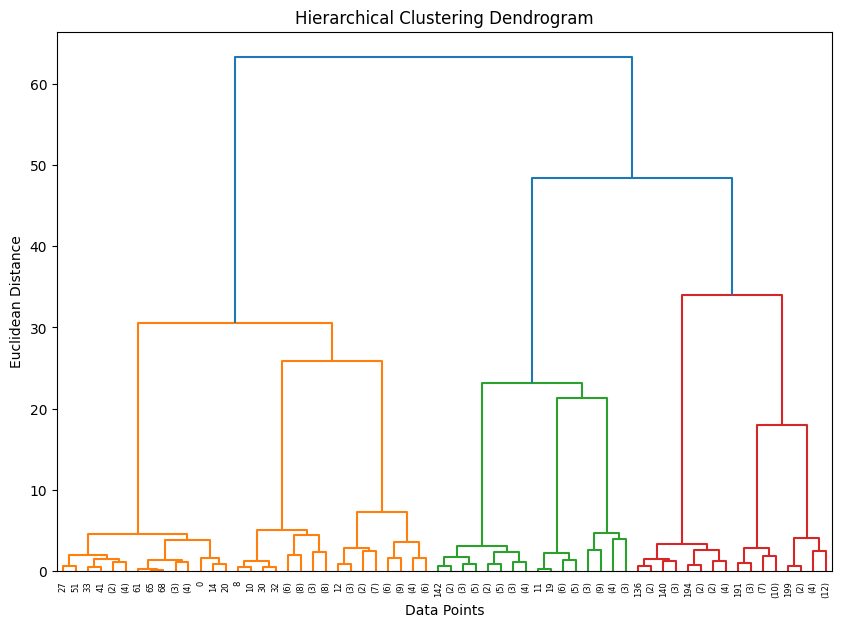

Unique clusters: [0 2 1 3]
Silhouette Score (4 clusters): 0.5068443126658607


In [169]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(df1, method='ward')  # 'ward' minimizes variance
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Fit Agglomerative Clustering with 4 clusters
n_clusters = 4  # Updated to 4 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_clusters_hc_4 = hierarchical_model.fit_predict(df1)

# Step 3: Add cluster labels to the original DataFrame
df1['Hierarchical_Cluster_4'] = predicted_clusters_hc_4 + 1  # Increment for better readability

# Convert predicted_clusters_hc_4 to a Pandas Series and concat with df1
predicted_clusters_hc_4_series = pd.Series(predicted_clusters_hc_4, name='Predicted_Clusters')
df_out_hc4 = pd.concat([df1, predicted_clusters_hc_4_series], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_hc4['Predicted_Clusters'].unique()}")

# Calculate silhouette score
score_hc_4 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_4']), predicted_clusters_hc_4)
print(f"Silhouette Score (4 clusters): {score_hc_4}")

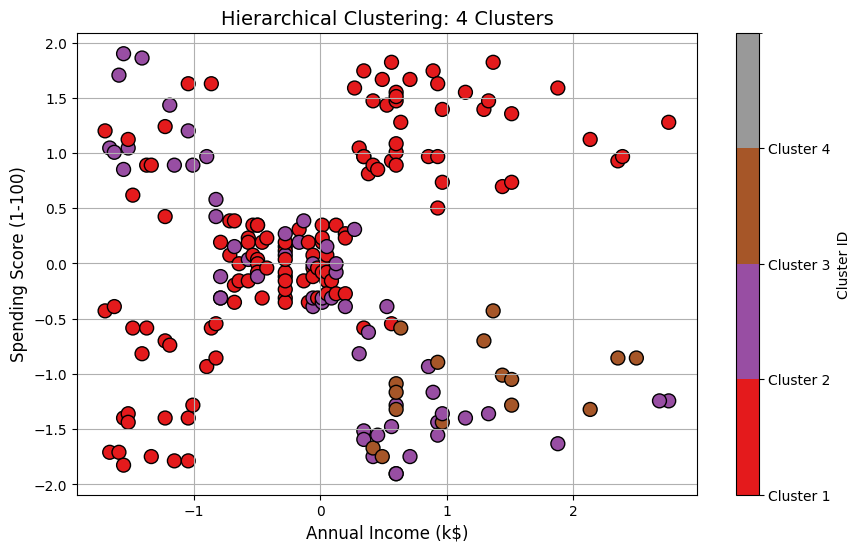

Silhouette Score (4 clusters): 0.5068443126658607


In [170]:
# Ensure n_clusters is set to 4
n_clusters = 4  # Explicitly set to 4 for 4 clusters

# Step 4: Visualize clusters in 2D with distinct cluster IDs
plt.figure(figsize=(10, 6))

# Define a discrete colormap
cmap = plt.cm.get_cmap('Set1', n_clusters)  # One color per cluster
norm = mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)

# Scatter plot with cluster colors
scatter = plt.scatter(
    df1["Annual Income (k$)"], 
    df1["Spending Score (1-100)"], 
    c=predicted_clusters_hc_4,  # Ensure this corresponds to 4 clusters
    cmap=cmap, 
    norm=norm, 
    s=100, 
    edgecolor='k'
)

# Plot settings
plt.title(f"Hierarchical Clustering: {n_clusters} Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Add discrete colorbar with proper cluster labels
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([f"Cluster {i}" for i in range(1, n_clusters + 1)])  # Add cluster labels

plt.grid(True)
plt.show()

# Calculate silhouette score
score_hc_4 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_4']), predicted_clusters_hc_4)
print(f"Silhouette Score (4 clusters): {score_hc_4}")

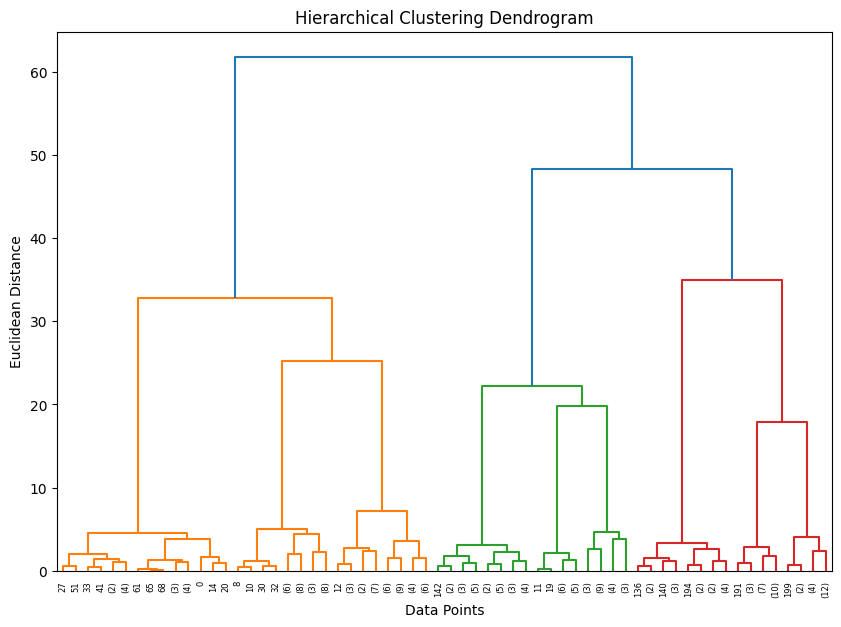

Unique clusters: [4 0 2 1 3]
Silhouette Score (5 clusters): 0.5202491833413185


In [175]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(df1, method='ward')  # 'ward' minimizes variance
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Fit Agglomerative Clustering with 5 clusters
n_clusters = 5  # Updated to 5 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_clusters_hc_5 = hierarchical_model.fit_predict(df1)

# Step 3: Add cluster labels to the original DataFrame
df1['Hierarchical_Cluster_5'] = predicted_clusters_hc_5 + 1  # Increment for better readability

# Convert predicted_clusters_hc_5 to a Pandas Series and concat with df1
predicted_clusters_hc_5_series = pd.Series(predicted_clusters_hc_5, name='Predicted_Clusters')
df_out_hc5 = pd.concat([df1, predicted_clusters_hc_5_series], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_hc5['Predicted_Clusters'].unique()}")

# Calculate silhouette score
score_hc_5 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_5']), predicted_clusters_hc_5)
print(f"Silhouette Score (5 clusters): {score_hc_5}")


Silhouette Score (5 clusters): 0.5202491833413185


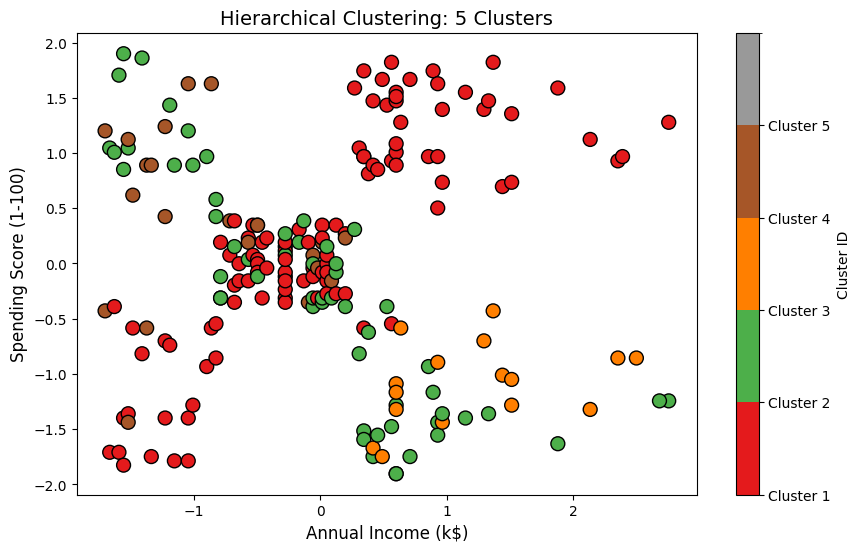

In [177]:
# Ensure n_clusters is set to 5
n_clusters = 5  # Explicitly set to 5 for 5 clusters

# Step 4: Visualize clusters in 2D with distinct cluster IDs
plt.figure(figsize=(10, 6))

# Define a discrete colormap
cmap = plt.cm.get_cmap('Set1', n_clusters)  # One color per cluster
norm = mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)

# Scatter plot with cluster colors
scatter = plt.scatter(
    df1["Annual Income (k$)"], 
    df1["Spending Score (1-100)"], 
    c=predicted_clusters_hc_5,  # Ensure this corresponds to 5 clusters
    cmap=cmap, 
    norm=norm, 
    s=100, 
    edgecolor='k'
)

# Plot settings
plt.title(f"Hierarchical Clustering: {n_clusters} Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Add discrete colorbar with proper cluster labels
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([f"Cluster {i}" for i in range(1, n_clusters + 1)])  # Add cluster labels

# Calculate silhouette score
score_hc_5 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_5']), predicted_clusters_hc_5)
print(f"Silhouette Score (5 clusters): {score_hc_5}")


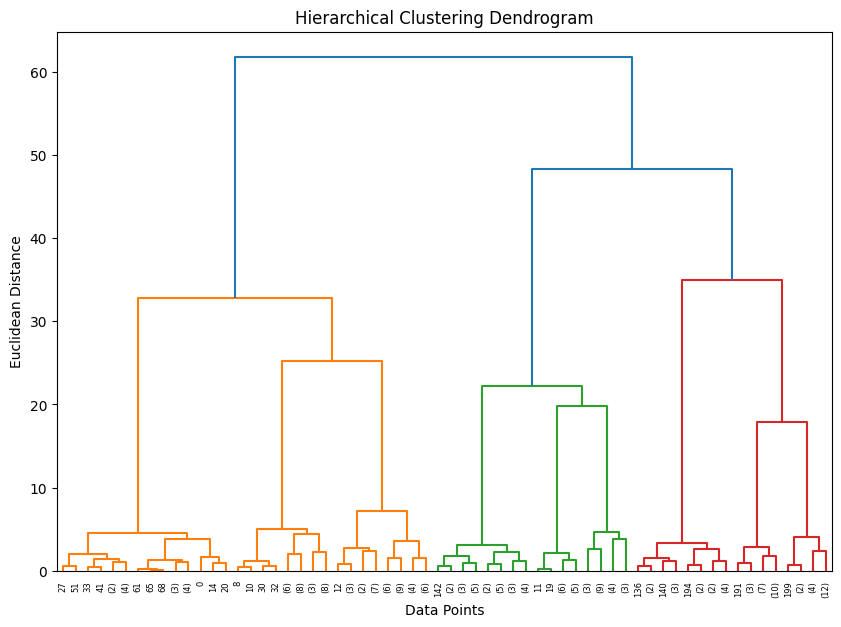

Unique clusters: [4 2 0 5 1 3]
Silhouette Score (6 clusters): 0.6233525476289673


In [180]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(df1, method='ward')  # 'ward' minimizes variance
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Fit Agglomerative Clustering with 6 clusters
n_clusters = 6  # Updated to 6 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_clusters_hc_6 = hierarchical_model.fit_predict(df1)

# Step 3: Add cluster labels to the original DataFrame
df1['Hierarchical_Cluster_6'] = predicted_clusters_hc_6 + 1  # Increment for better readability

# Convert predicted_clusters_hc_6 to a Pandas Series and concat with df1
predicted_clusters_hc_6_series = pd.Series(predicted_clusters_hc_6, name='Predicted_Clusters')
df_out_hc6 = pd.concat([df1, predicted_clusters_hc_6_series], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_hc6['Predicted_Clusters'].unique()}")

# Calculate silhouette score
score_hc_6 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_6']), predicted_clusters_hc_6)
print(f"Silhouette Score (6 clusters): {score_hc_6}")


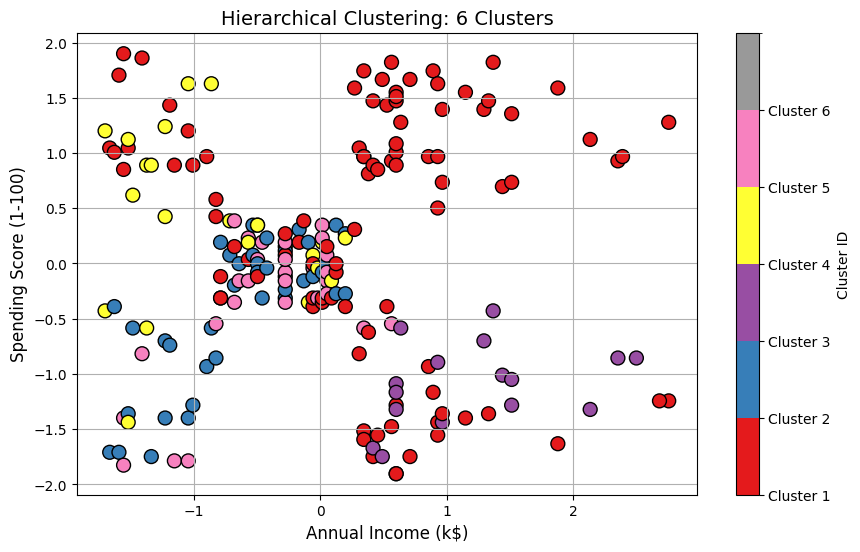

Silhouette Score (6 clusters): 0.6233525476289673


In [181]:
# Ensure n_clusters is set to 6
n_clusters = 6  # Explicitly set to 6 for 6 clusters

# Step 4: Visualize clusters in 2D with distinct cluster IDs
plt.figure(figsize=(10, 6))

# Define a discrete colormap
cmap = plt.cm.get_cmap('Set1', n_clusters)  # One color per cluster
norm = mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)

# Scatter plot with cluster colors
scatter = plt.scatter(
    df1["Annual Income (k$)"], 
    df1["Spending Score (1-100)"], 
    c=predicted_clusters_hc_6,  # Ensure this corresponds to 6 clusters
    cmap=cmap, 
    norm=norm, 
    s=100, 
    edgecolor='k'
)

# Plot settings
plt.title(f"Hierarchical Clustering: {n_clusters} Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Add discrete colorbar with proper cluster labels
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([f"Cluster {i}" for i in range(1, n_clusters + 1)])  # Add cluster labels

plt.grid(True)
plt.show()

# Calculate silhouette score
score_hc_6 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_6']), predicted_clusters_hc_6)
print(f"Silhouette Score (6 clusters): {score_hc_6}")

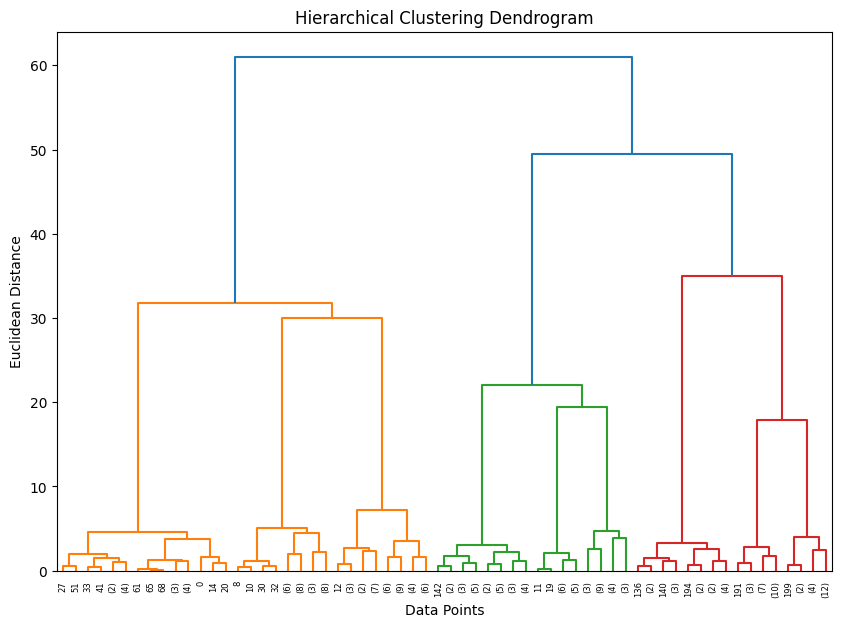

Unique clusters: [4 2 0 5 6 1 3]
Silhouette Score (7 clusters): 0.6599243790405722


In [183]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(df1, method='ward')  # 'ward' minimizes variance
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Fit Agglomerative Clustering with 7 clusters
n_clusters = 7  # Updated to 7 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_clusters_hc_7 = hierarchical_model.fit_predict(df1)

# Step 3: Add cluster labels to the original DataFrame
df1['Hierarchical_Cluster_7'] = predicted_clusters_hc_7 + 1  # Increment for better readability

# Convert predicted_clusters_hc_7 to a Pandas Series and concat with df1
predicted_clusters_hc_7_series = pd.Series(predicted_clusters_hc_7, name='Predicted_Clusters')
df_out_hc7 = pd.concat([df1, predicted_clusters_hc_7_series], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_hc7['Predicted_Clusters'].unique()}")

# Calculate silhouette score
score_hc_7 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_7']), predicted_clusters_hc_7)
print(f"Silhouette Score (7 clusters): {score_hc_7}")


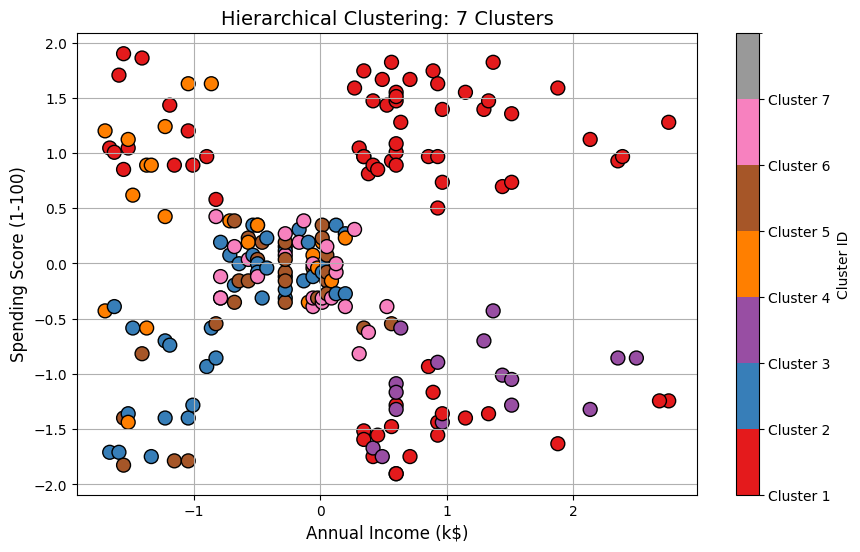

Silhouette Score (7 clusters): 0.6599243790405722


In [184]:
# Ensure n_clusters is set to 7
n_clusters = 7  # Explicitly set to 7 for 7 clusters

# Step 4: Visualize clusters in 2D with distinct cluster IDs
plt.figure(figsize=(10, 6))

# Define a discrete colormap
cmap = plt.cm.get_cmap('Set1', n_clusters)  # One color per cluster
norm = mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)

# Scatter plot with cluster colors
scatter = plt.scatter(
    df1["Annual Income (k$)"], 
    df1["Spending Score (1-100)"], 
    c=predicted_clusters_hc_7,  # Ensure this corresponds to 7 clusters
    cmap=cmap, 
    norm=norm, 
    s=100, 
    edgecolor='k'
)

# Plot settings
plt.title(f"Hierarchical Clustering: {n_clusters} Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Add discrete colorbar with proper cluster labels
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([f"Cluster {i}" for i in range(1, n_clusters + 1)])  # Add cluster labels

plt.grid(True)
plt.show()

# Calculate silhouette score
score_hc_7 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_7']), predicted_clusters_hc_7)
print(f"Silhouette Score (7 clusters): {score_hc_7}")


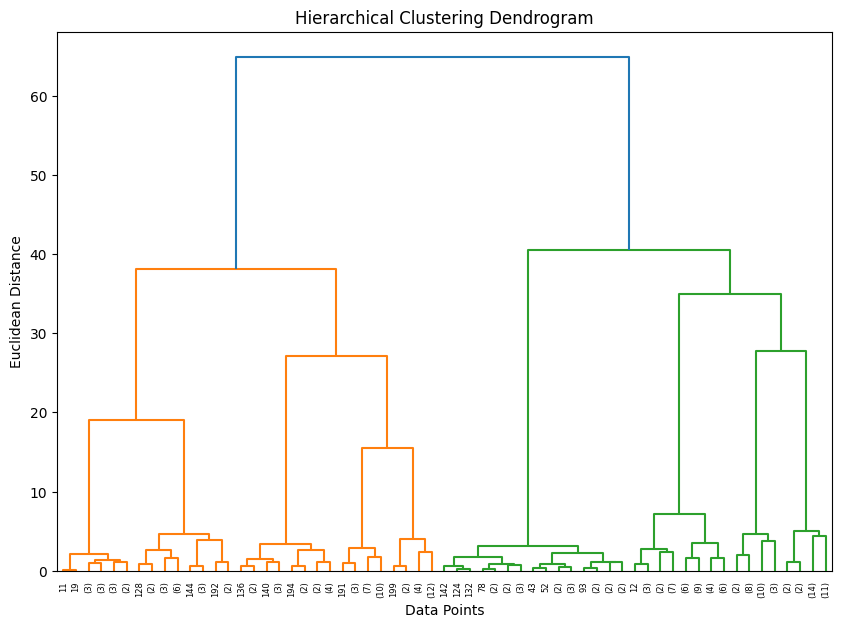

Unique clusters: [2 1 7 3 5 0 4 6]
Silhouette Score (8 clusters): 0.6940576983238215


In [185]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(df1, method='ward')  # 'ward' minimizes variance
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Fit Agglomerative Clustering with 8 clusters
n_clusters = 8  # Updated to 8 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_clusters_hc_8 = hierarchical_model.fit_predict(df1)

# Step 3: Add cluster labels to the original DataFrame
df1['Hierarchical_Cluster_8'] = predicted_clusters_hc_8 + 1  # Increment for better readability

# Convert predicted_clusters_hc_8 to a Pandas Series and concat with df1
predicted_clusters_hc_8_series = pd.Series(predicted_clusters_hc_8, name='Predicted_Clusters')
df_out_hc8 = pd.concat([df1, predicted_clusters_hc_8_series], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_hc8['Predicted_Clusters'].unique()}")

# Calculate silhouette score
score_hc_8 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_8']), predicted_clusters_hc_8)
print(f"Silhouette Score (8 clusters): {score_hc_8}")


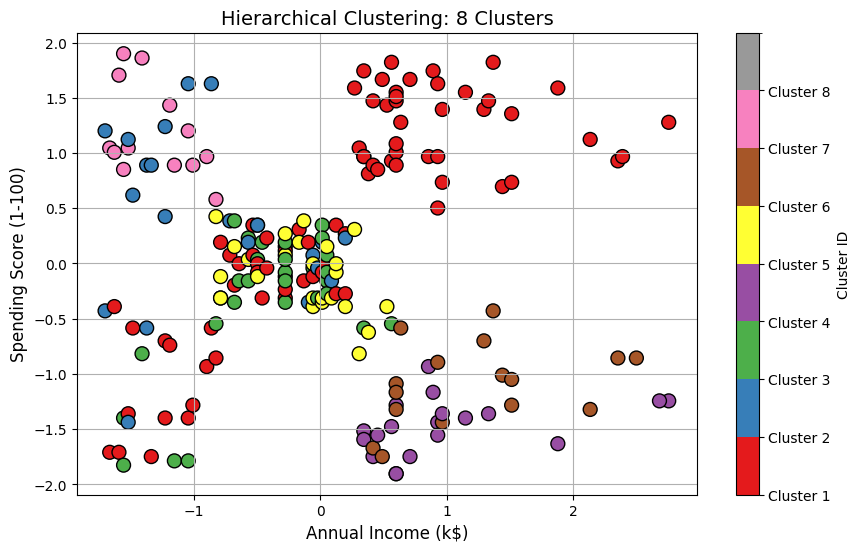

Silhouette Score (8 clusters): 0.6940576983238215


In [186]:
# Ensure n_clusters is set to 8
n_clusters = 8  # Explicitly set to 8 for 8 clusters

# Step 4: Visualize clusters in 2D with distinct cluster IDs
plt.figure(figsize=(10, 6))

# Define a discrete colormap
cmap = plt.cm.get_cmap('Set1', n_clusters)  # One color per cluster
norm = mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)

# Scatter plot with cluster colors
scatter = plt.scatter(
    df1["Annual Income (k$)"], 
    df1["Spending Score (1-100)"], 
    c=predicted_clusters_hc_8,  # Ensure this corresponds to 8 clusters
    cmap=cmap, 
    norm=norm, 
    s=100, 
    edgecolor='k'
)

# Plot settings
plt.title(f"Hierarchical Clustering: {n_clusters} Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Add discrete colorbar with proper cluster labels
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([f"Cluster {i}" for i in range(1, n_clusters + 1)])  # Add cluster labels

plt.grid(True)
plt.show()

# Calculate silhouette score
score_hc_8 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_8']), predicted_clusters_hc_8)
print(f"Silhouette Score (8 clusters): {score_hc_8}")


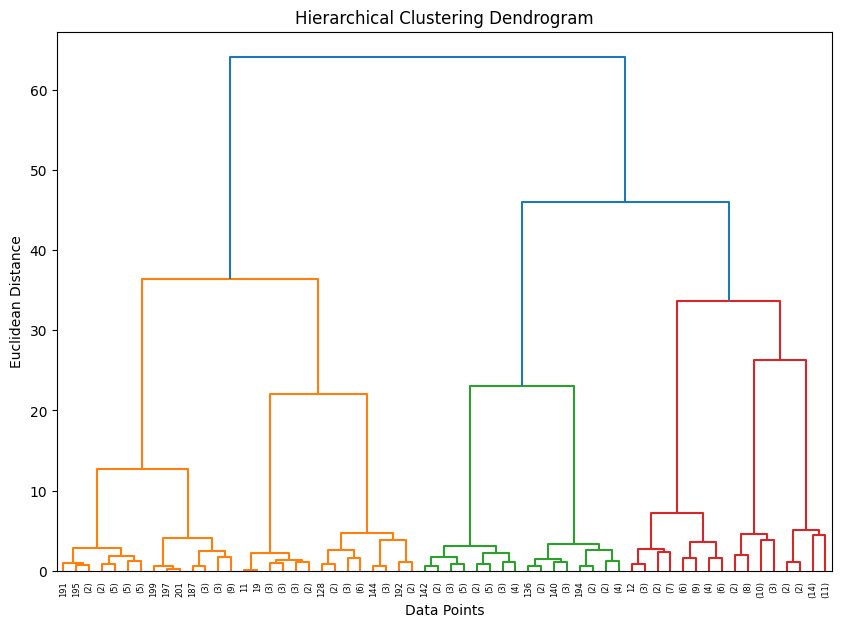

Unique clusters: [5 0 7 2 6 4 8 1 3]
Silhouette Score (9 clusters): 0.7156243532427308


In [187]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(df1, method='ward')  # 'ward' minimizes variance
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 2: Fit Agglomerative Clustering with 9 clusters
n_clusters = 9  # Updated to 9 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
predicted_clusters_hc_9 = hierarchical_model.fit_predict(df1)

# Step 3: Add cluster labels to the original DataFrame
df1['Hierarchical_Cluster_9'] = predicted_clusters_hc_9 + 1  # Increment for better readability

# Convert predicted_clusters_hc_9 to a Pandas Series and concat with df1
predicted_clusters_hc_9_series = pd.Series(predicted_clusters_hc_9, name='Predicted_Clusters')
df_out_hc9 = pd.concat([df1, predicted_clusters_hc_9_series], axis=1)

# Verify unique clusters
print(f"Unique clusters: {df_out_hc9['Predicted_Clusters'].unique()}")

# Calculate silhouette score
score_hc_9 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_9']), predicted_clusters_hc_9)
print(f"Silhouette Score (9 clusters): {score_hc_9}")

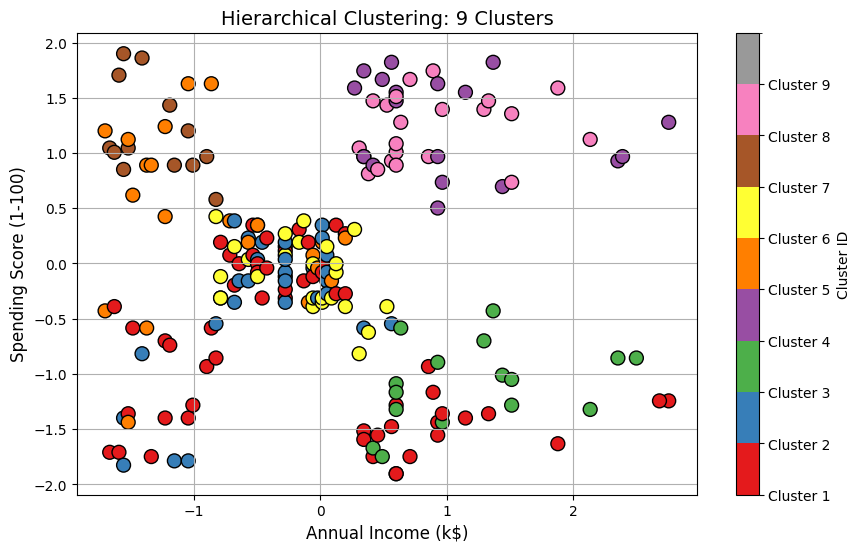

Silhouette Score (9 clusters): 0.7156243532427308


In [188]:
# Ensure n_clusters is set to 9
n_clusters = 9  # Explicitly set to 9 for 9 clusters

# Step 4: Visualize clusters in 2D with distinct cluster IDs
plt.figure(figsize=(10, 6))

# Define a discrete colormap
cmap = plt.cm.get_cmap('Set1', n_clusters)  # One color per cluster
norm = mcolors.BoundaryNorm(boundaries=range(1, n_clusters + 2), ncolors=n_clusters)

# Scatter plot with cluster colors
scatter = plt.scatter(
    df1["Annual Income (k$)"], 
    df1["Spending Score (1-100)"], 
    c=predicted_clusters_hc_9,  # Ensure this corresponds to 9 clusters
    cmap=cmap, 
    norm=norm, 
    s=100, 
    edgecolor='k'
)

# Plot settings
plt.title(f"Hierarchical Clustering: {n_clusters} Clusters", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

# Add discrete colorbar with proper cluster labels
cbar = plt.colorbar(scatter, ticks=range(1, n_clusters + 1))
cbar.set_label("Cluster ID")
cbar.ax.set_yticklabels([f"Cluster {i}" for i in range(1, n_clusters + 1)])  # Add cluster labels

plt.grid(True)
plt.show()

# Calculate silhouette score
score_hc_9 = silhouette_score(df1.drop(columns=['Hierarchical_Cluster_9']), predicted_clusters_hc_9)
print(f"Silhouette Score (9 clusters): {score_hc_9}")


### Conclusions for Each Predicted Cluster:
Cluster 1:

Age: Slightly above average.
Annual Income: Slightly below average.
Spending Score: Near average, indicating moderate spending habits.
Gender Distribution: Predominantly female (-0.892446 indicates male is not dominant).
Conclusion: This cluster represents individuals who are slightly older than average with a modest income and moderate spending habits, predominantly female.


Cluster 2:

Age: Slightly younger than average.
Annual Income: High.
Spending Score: High, indicating high spending habits.
Gender Distribution: Predominantly male (1.120516 indicates male dominance).
Conclusion: This cluster represents younger individuals with a high income and high spending habits, predominantly male.


Cluster 3:

Age: Slightly younger than average.
Annual Income: High.
Spending Score: High, similar to Cluster 2 but slightly less.
Gender Distribution: Predominantly female (-0.892446 indicates male is not dominant).
Conclusion: This cluster represents younger individuals with high income and spending habits, predominantly female.


Cluster 4:

Age: Average.
Annual Income: High.
Spending Score: Low, indicating low spending habits.
Gender Distribution: Predominantly male (1.120516 indicates male dominance).
Conclusion: This cluster represents average-aged individuals with high income but low spending habits, predominantly male.


Cluster 5:

Age: Older than average.
Annual Income: Below average.
Spending Score: Slightly above average.
Gender Distribution: Predominantly male (1.120516 indicates male dominance).
Conclusion: This cluster represents older individuals with lower income and moderate spending habits, predominantly male.


Cluster 6:

Age: Significantly above average.
Annual Income: Below average.
Spending Score: Below average.
Gender Distribution: Predominantly male (1.120516 indicates male dominance).
Conclusion: This cluster represents older individuals with lower income and conservative spending habits, predominantly male.


Cluster 7:

Age: Older than average.
Annual Income: Below average.
Spending Score: Slightly above average, similar to Cluster 5 but less.
Gender Distribution: Predominantly female (-0.892446 indicates male is not dominant).
Conclusion: This cluster represents older individuals with lower income and slightly above-average spending habits, predominantly female.


Cluster 8:

Age: Average.
Annual Income: High.
Spending Score: Low, indicating low spending habits.
Gender Distribution: Predominantly female (-0.892446 indicates male is not dominant).
Conclusion: This cluster represents average-aged individuals with high income but conservative spending habits, predominantly female.


Cluster 9:

Age: Average.
Annual Income: Low.
Spending Score: Low, indicating low spending habits.
Gender Distribution: Predominantly female (-0.892446 indicates male is not dominant).
Conclusion: This cluster represents average-aged individuals with low income and conservative spending habits, predominantly female.


Summary Insights:
Clusters 2 and 3 represent younger individuals with high incomes and high spending habits, differentiated by gender.
Clusters 4 and 8 show average-aged individuals with high incomes but conservative spending habits, differing in gender.
Clusters 5, 6, and 7 represent older individuals with lower income, differing slightly in spending behavior and gender distribution.
Cluster 9 has the lowest income and spending habits, dominated by females.
Cluster 1 represents balanced individuals with near-average attributes, predominantly female.